In [1]:
import pandas as pd
import numpy as np

df_ug_metal = pd.read_csv(r"C:\Users\dharm\OneDrive\Desktop\Table_metal_ug.csv",low_memory = False)

In [2]:
Table_1  = df_ug_metal [["MINE_ID","AVG_ANNUAL_EMPL","ANNUAL_HRS","Citation","No. S&S","Order","TOTAL_INSP_HOURS","FATALITY","NO_AFFECTED","PROPOSED_PENALTY"]].reset_index(drop=True)

In [3]:
# Table_1  = df_ug_metal [["MINE_ID","AVG_ANNUAL_EMPL","ANNUAL_HRS","Citation","No. S&S","Order","TOTAL_INSP_HOURS","NO_AFFECTED","PROPOSED_PENALTY"]].reset_index(drop=True)

In [4]:
Table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MINE_ID           98 non-null     float64
 1   AVG_ANNUAL_EMPL   93 non-null     float64
 2   ANNUAL_HRS        93 non-null     float64
 3   Citation          98 non-null     float64
 4   No. S&S           98 non-null     float64
 5   Order             98 non-null     float64
 6   TOTAL_INSP_HOURS  34 non-null     float64
 7   FATALITY          45 non-null     float64
 8   NO_AFFECTED       98 non-null     float64
 9   PROPOSED_PENALTY  98 non-null     float64
dtypes: float64(10)
memory usage: 7.8 KB


In [5]:
Table_1 ["No. NLT Accidents"]  = df_ug_metal["ACCIDENT ONLY"] + df_ug_metal["NO DYS AWY FRM WRK,NO RSTR ACT"]
Table_1 ["No. LT Accidents"]  = df_ug_metal["PERM TOT OR PERM PRTL DISABLTY"] + df_ug_metal["DAYS AWAY FROM WORK ONLY"] + df_ug_metal["DYS AWY FRM WRK & RESTRCTD ACT"]
Table_1 ["Restricted and lost work days"] = df_ug_metal["DAYS_RESTRICT"] + df_ug_metal["DAYS_LOST"]

In [6]:
Table_1

,MINE_ID,AVG_ANNUAL_EMPL,ANNUAL_HRS,Citation,No. S&S,Order,TOTAL_INSP_HOURS,FATALITY,NO_AFFECTED,PROPOSED_PENALTY,No. NLT Accidents,No. LT Accidents,Restricted and lost work days
0,200152.0,107.0,193025.0,2.0,0.0,0.0,NaN,NaN,2.0,200.0,NaN,NaN,NaN
1,200840.0,18.0,16515.0,4.0,0.0,0.0,NaN,NaN,4.0,400.0,NaN,NaN,NaN
2,202286.0,24.0,39711.0,21.0,7.0,0.0,13.25,0.0,25.0,24692.0,1.0,1.0,8.0
3,202443.0,35.0,55252.0,8.0,1.0,0.0,NaN,0.0,10.0,4564.0,1.0,0.0,0.0
4,202620.0,103.0,196996.0,48.0,14.0,0.0,7.00,0.0,52.0,40200.0,2.0,2.0,348.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,5001267.0,383.0,941510.0,106.0,34.0,3.0,NaN,0.0,109.0,89952.0,4.0,4.0,87.0
94,5001544.0,300.0,716026.0,93.0,28.0,3.0,241.50,0.0,187.0,59549.0,0.0,11.0,529.0
95,5001614.0,8.0,182.0,1.0,0.0,0.0,NaN,NaN,1.0,100.0,NaN,NaN,NaN
96,5001642.0,329.0,762317.0,59.0,9.0,2.0,NaN,0.0,84.0,53695.0,10.0,4.0,561.0


In [7]:
# Table_1.to_csv(r"C:\Users\dharm\OneDrive\Desktop\checking_table1.csv")

In [8]:
Table_2 = pd.DataFrame()

Table_2 = Table_1[["MINE_ID"]].reset_index(drop = True)

# Table_2["NO_AFFECTED"] =   (Table_1["NO_AFFECTED"]  / Table_1["ANNUAL_HRS"]) *200000

Table_2["PROPOSED_PENALTY"] = (Table_1["PROPOSED_PENALTY"])

Table_2["NDL_IR"] = (Table_1["No. NLT Accidents"] / Table_1["ANNUAL_HRS"]) *200000

Table_2["NFDL_IR"]=   (Table_1["No. LT Accidents"] / Table_1["ANNUAL_HRS"]) *200000

Table_2["SM"] =   (Table_1["Restricted and lost work days"] / Table_1["ANNUAL_HRS"]) *200000

Table_2["C/100"] = (Table_1["Citation"] * 100)/ Table_1["TOTAL_INSP_HOURS"]

Table_2["SS/100"] = (Table_1["No. S&S"] * 100)/ Table_1["TOTAL_INSP_HOURS"]

Table_2["O/100"] = (Table_1["Order"] * 100)/ Table_1["TOTAL_INSP_HOURS"]




In [9]:
Table_2.describe()

,MINE_ID,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100
count,9.800000e+01,98.000000,45.000000,45.000000,42.000000,34.000000,34.000000,34.000000
mean,2.148202e+06,26773.948980,2.409028,1.673767,168.562363,201.477924,53.934145,8.785729
std,1.460625e+06,69471.689767,2.611833,2.659986,239.065562,342.356113,91.887984,21.102974
min,2.001520e+05,100.000000,0.000000,0.000000,0.000000,6.382979,0.000000,0.000000
25%,5.048870e+05,349.750000,0.624688,0.000000,20.031172,22.878160,5.375940,0.000000
50%,2.402139e+06,1734.500000,1.727187,0.794829,89.695413,44.035727,11.574268,0.454201
75%,2.602692e+06,22793.000000,2.866069,2.030498,199.400073,155.747357,54.116638,3.872180
max,5.001857e+06,522429.000000,11.985138,12.030075,1117.706350,1320.000000,371.428571,94.117647


In [10]:
Table_2 = Table_2.set_index(["MINE_ID"])

In [11]:
Table_2 = Table_2.fillna(0)

In [12]:
Table_2

,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100
MINE_ID,,,,,,,
200152.0,200.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
200840.0,400.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
202286.0,24692.0,5.036388,5.036388,40.291103,158.490566,52.830189,0.000000
202443.0,4564.0,3.619778,0.000000,0.000000,0.000000,0.000000,0.000000
202620.0,40200.0,2.030498,2.030498,353.306666,685.714286,200.000000,0.000000
...,...,...,...,...,...,...,...
5001267.0,89952.0,0.849699,0.849699,18.480951,0.000000,0.000000,0.000000
5001544.0,59549.0,0.000000,3.072514,147.759998,38.509317,11.594203,1.242236
5001614.0,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
df = Table_2.copy()

In [14]:
# df = np.nan_to_num(df)

In [15]:
# df = df.replace([np.inf, -np.inf], 0) 

In [16]:
# from sklearn.preprocessing import StandardScaler, normalize
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)
  
# # Normalizing the data so that the data approximately 
# # follows a Gaussian distribution
# X_normalized = normalize(X_scaled)
  
# # Converting the numpy array into a pandas DataFrame
# df = pd.DataFrame(X_normalized)

In [17]:
# df.describe()

In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [19]:
def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

In [20]:
df.describe()

,0,1,2,3,4,5,6
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.051067,0.092297,0.063887,0.064633,0.052955,0.050378,0.032386
std,0.133004,0.177984,0.164419,0.158001,0.167982,0.160150,0.138197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.003129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.043446,0.126299,0.058254,0.035536,0.018503,0.015081,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df = df.set_index(Table_1["MINE_ID"])

In [22]:
# df.to_csv(r"C:\Users\dharm\OneDrive\Desktop\Datasets\df_2021.csv")

In [23]:
# Table_2.to_csv(r"C:\Users\dharm\OneDrive\Desktop\Table_2.csv")

In [24]:
# df  = df.rename(columns={0: 'NDL_IR',1: 'NFDL_IR',2: 'SM',3: 'C/100',4:'SS/100',5:'O/100',6:"PROPOSED_PENALTY",7:"NO_AFFECTED"})

In [25]:
# df  = df.rename(columns={3: 'NDL_IR',4: 'NFDL_IR',5: 'SM',6: 'C/100',7:'SS/100',8:'O/100',2:"PROPOSED_PENALTY",1:"NO_AFFECTED"})

In [26]:
df  = df.rename(columns={1: 'NDL_IR',2: 'NFDL_IR',3: 'SM',4: 'C/100',5:'SS/100',6:'O/100',0:"PROPOSED_PENALTY"})

In [27]:
df

,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100
MINE_ID,,,,,,,
200152.0,0.000191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
200840.0,0.000574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
202286.0,0.047081,0.420219,0.418650,0.036048,0.120069,0.142235,0.000000
202443.0,0.008546,0.302022,0.000000,0.000000,0.000000,0.000000,0.000000
202620.0,0.076772,0.169418,0.168785,0.316100,0.519481,0.538462,0.000000
...,...,...,...,...,...,...,...
5001267.0,0.172022,0.070896,0.070631,0.016535,0.000000,0.000000,0.000000
5001544.0,0.113815,0.000000,0.255403,0.132199,0.029174,0.031215,0.013199
5001614.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


For n_clusters = 2 The average silhouette_score is : 0.7100314668165454
For n_clusters = 3 The average silhouette_score is : 0.6621633158034954
For n_clusters = 4 The average silhouette_score is : 0.5764614323057332
For n_clusters = 5 The average silhouette_score is : 0.6673905650613419
For n_clusters = 6 The average silhouette_score is : 0.5990006331809554
For n_clusters = 7 The average silhouette_score is : 0.5837365892387435
For n_clusters = 8 The average silhouette_score is : 0.5815541002115848
For n_clusters = 9 The average silhouette_score is : 0.600773720719537
For n_clusters = 10 The average silhouette_score is : 0.5984991053014638


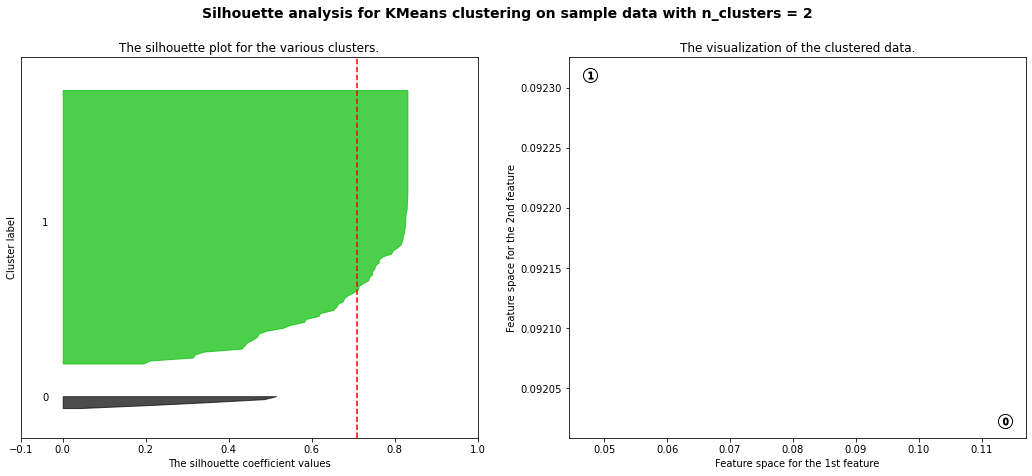

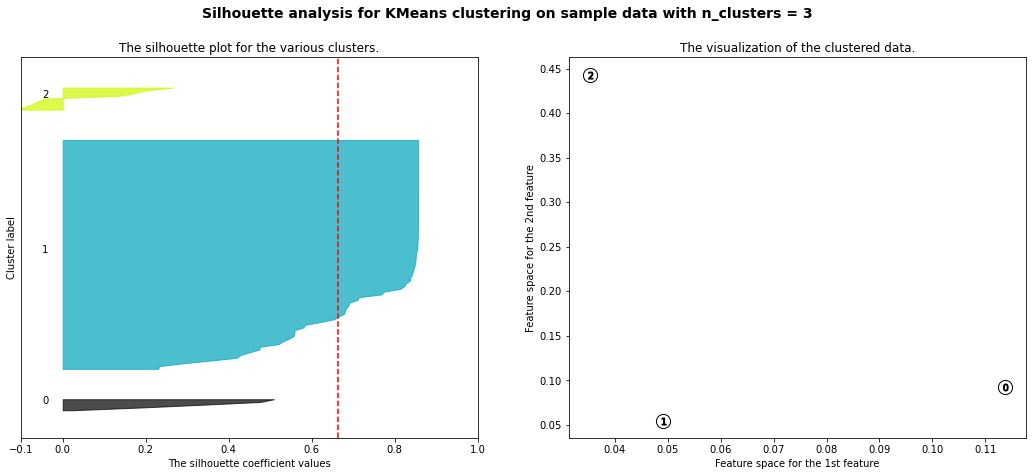

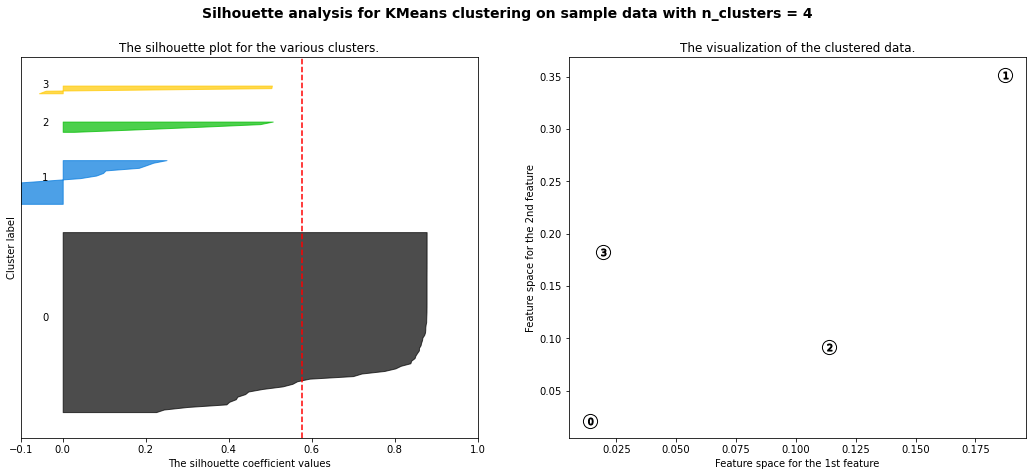

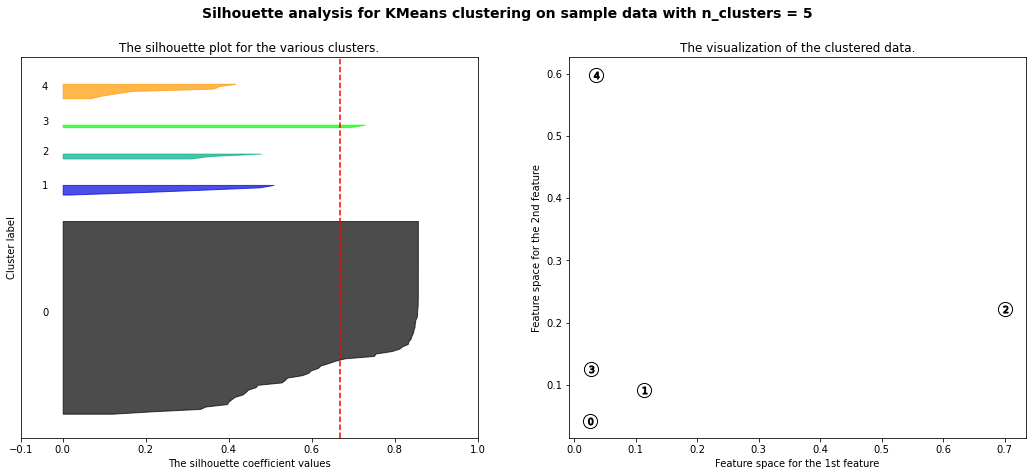

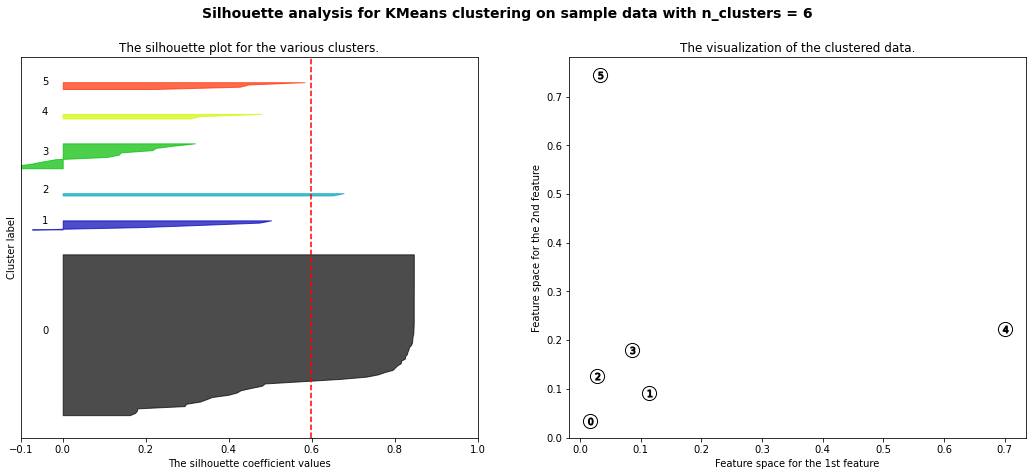

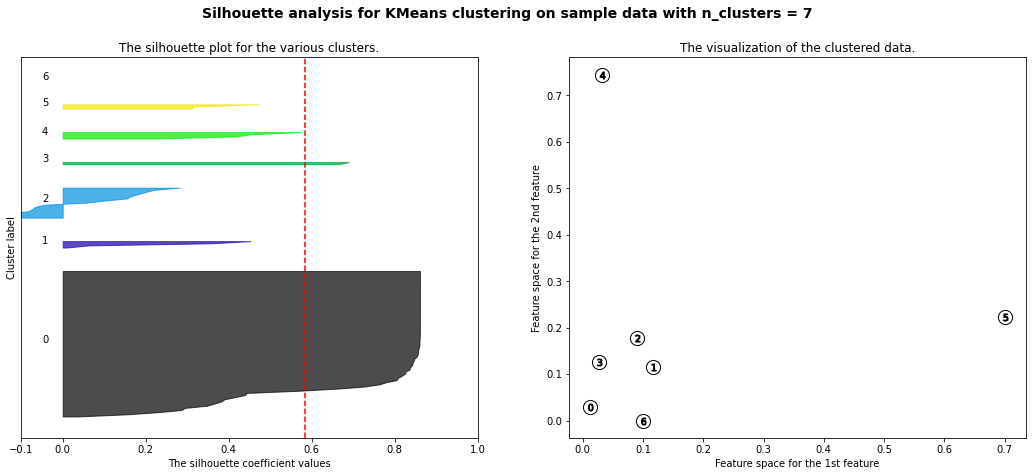

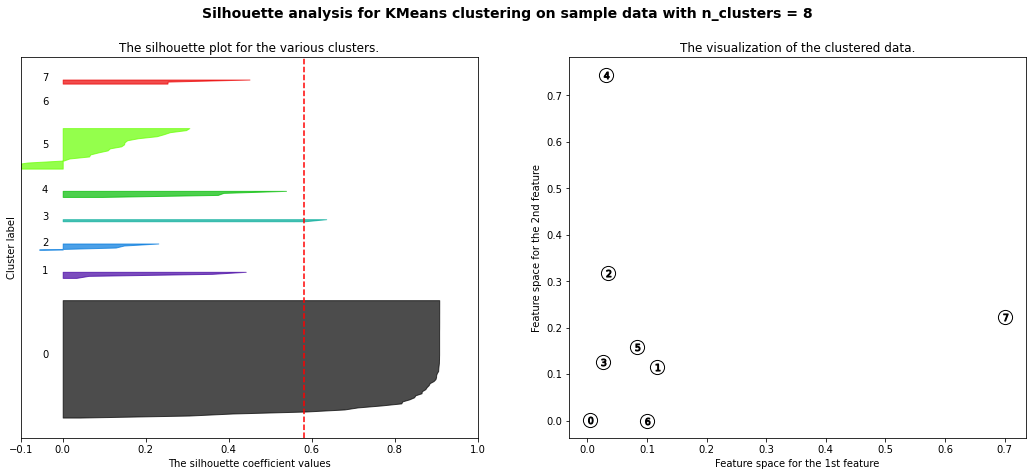

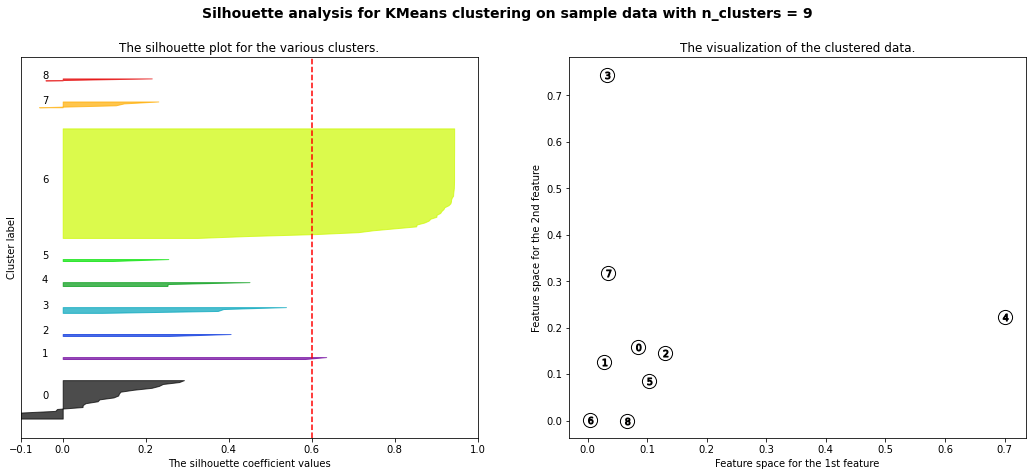

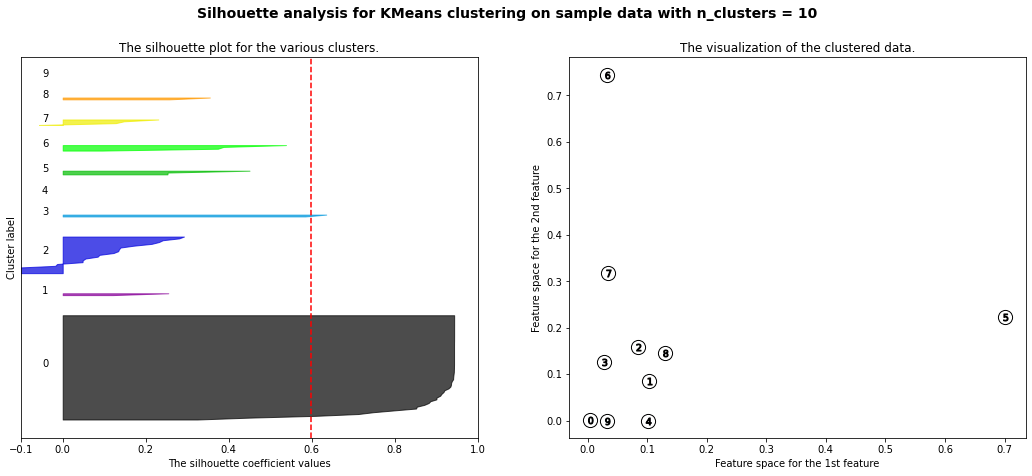

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = df,df["PROPOSED_PENALTY"]

range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [29]:
# pip install yellowbrick

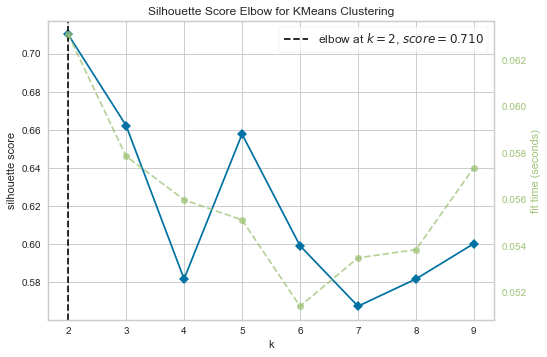

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
# Import ElbowVisualizer

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()    

In [31]:
df_kmeans = df.copy()

C:\Users\dharm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


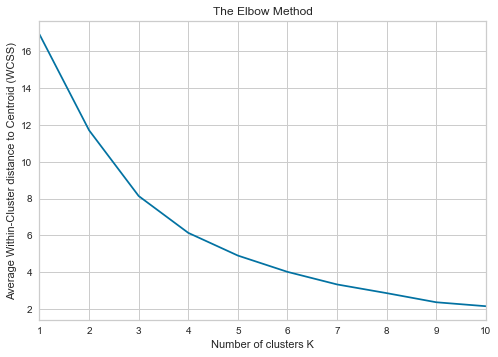

In [32]:
# Elbow Method
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X= df_kmeans
# Using the elbow method to find  the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter= 500, n_init= 10, random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')  
plt.xlim(1,10)
plt.show()

In [33]:
import random
from sklearn.cluster import KMeans
random.seed(10)
model = KMeans(3)
model.fit(df_kmeans)
a=model.cluster_centers_
x=model.predict(df_kmeans)
df_kmeans["cluster_number"]=x

In [34]:
Table_3 = df.copy()

In [35]:
Table_3 ["Kmeans clustering"] = df_kmeans['cluster_number']

In [36]:
df_kmeans['cluster_number'].value_counts()

0    84
2     9
1     5
Name: cluster_number, dtype: int64

In [37]:
df_aggolmerative_clustering = df.copy()

In [38]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
# define the model
random.seed(20)
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(df_aggolmerative_clustering)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster

In [39]:
df_aggolmerative_clustering["cluster_number"]= yhat

In [40]:
df_aggolmerative_clustering['cluster_number'].value_counts()

0    90
1     6
2     2
Name: cluster_number, dtype: int64

In [41]:
Table_3 ["Agglomerative clustering"] = df_aggolmerative_clustering['cluster_number']

In [42]:
df_birch = df.copy()

In [43]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
# define the model
random.seed(20)
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(df_birch)
# assign a cluster to each example
yhat = model.predict(df_birch)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster

In [44]:
df_birch["cluster_number"]= yhat

In [45]:
df_birch['cluster_number'].value_counts()

0    90
1     6
2     2
Name: cluster_number, dtype: int64

In [46]:
Table_3 ["birch propagation clustering"] = df_birch['cluster_number']

In [47]:
# df_optics = df.copy()

In [48]:
# from sklearn.cluster import OPTICS
# random.seed(20)
# # define the model
# model = OPTICS(eps=0.8, min_samples=4)
# # fit model and predict clusters

# yhat = model.fit_predict(df_optics)
# # retrieve unique clusters
# clusters = unique(yhat)

In [49]:
# df_optics["cluster_number"]= yhat

In [50]:
# df_optics['cluster_number'].value_counts()

In [51]:
# Table_3 ["optics clustering"] = df_optics['cluster_number']

In [52]:
df_spectral = df.copy()

In [53]:
from sklearn.cluster import SpectralClustering

In [54]:
spectral_cluster_model= SpectralClustering(
    n_clusters=3, 
    random_state=15,  
    affinity='nearest_neighbors'
)

In [55]:
random.seed(20)
df_spectral ['cluster'] = spectral_cluster_model.fit_predict(df_spectral)

In [56]:
df_spectral['cluster'].value_counts()

1    46
0    40
2    12
Name: cluster, dtype: int64

In [57]:
Table_3 ["Spectral clustering"] = df_spectral['cluster']

In [58]:
df_guassian = df.copy()

In [59]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture
random.seed(20)
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(df_guassian)

GaussianMixture(n_components=3)

In [60]:
yhat = gmm_model.predict(df_guassian)

In [61]:
df_guassian["cluster_number"]= yhat

In [62]:
df_guassian['cluster_number'].value_counts()

0    67
2    26
1     5
Name: cluster_number, dtype: int64

In [63]:
Table_3 ["Guassian clustering"] = df_guassian['cluster_number']

In [64]:
# !pip install fuzzy-c-means

In [65]:
df_fuzzy = df.copy()

In [66]:
x = df_fuzzy.values

In [67]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [68]:
random.seed(20)
fcm = FCM(n_clusters=3)
fcm.fit(x)

In [69]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(x)

In [70]:
df_fuzzy["cluster_number"]= fcm_labels

In [71]:
df_fuzzy['cluster_number'].value_counts()

2    66
0    27
1     5
Name: cluster_number, dtype: int64

In [72]:
Table_3 ["fuzzy clustering"] = df_fuzzy['cluster_number']

In [73]:
Table_3.to_csv(r"C:\Users\dharm\OneDrive\Desktop\Table_3.csv")

In [74]:
Table_3.groupby("Kmeans clustering").mean()

,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100,Agglomerative clustering,birch propagation clustering,Spectral clustering,Guassian clustering,fuzzy clustering
Kmeans clustering,,,,,,,,,,,,
0,0.049035,0.054701,0.025419,0.028351,0.015770,0.013659,0.012346,0.011905,0.011905,0.833333,0.404762,1.571429
1,0.113707,0.092023,0.048018,0.111609,0.713369,0.687149,0.406429,1.000000,1.000000,0.000000,1.000000,1.000000
2,0.035240,0.443338,0.431740,0.377169,0.033117,0.039325,0.011623,0.444444,0.444444,0.000000,2.000000,0.000000


In [75]:
Table_3.groupby("fuzzy clustering").mean()

,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100,Kmeans clustering,Agglomerative clustering,birch propagation clustering,Spectral clustering,Guassian clustering
fuzzy clustering,,,,,,,,,,,,
0,0.143715,0.282496,0.200549,0.187451,0.040740,0.037708,0.012875,0.666667,0.148148,0.148148,0.000000,1.407407
1,0.113707,0.092023,0.048018,0.111609,0.713369,0.687149,0.406429,1.000000,1.000000,1.000000,0.000000,1.000000
2,0.008421,0.014509,0.009182,0.010831,0.007921,0.007321,0.012031,0.000000,0.015152,0.015152,1.060606,0.212121


In [76]:
Table_3.groupby("Spectral clustering").mean()

,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100,Kmeans clustering,Agglomerative clustering,birch propagation clustering,Guassian clustering,fuzzy clustering
Spectral clustering,,,,,,,,,,,,
0,0.119632,0.224865,0.155895,0.156024,0.119323,0.113089,0.060253,0.575,0.225000,0.225000,1.425,0.525
1,0.004767,0.001097,0.000546,0.002024,0.009057,0.008989,0.016603,0.000,0.021739,0.021739,0.000,2.000
2,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,2.000


In [77]:
Table_3.groupby("Guassian clustering").mean()

,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100,Kmeans clustering,Agglomerative clustering,birch propagation clustering,Spectral clustering,fuzzy clustering
Guassian clustering,,,,,,,,,,,,
0,0.043365,0.029335,0.005758,0.007461,0.017396,0.014699,0.014946,0.000000,0.014925,0.014925,1.044776,1.761194
1,0.113707,0.092023,0.048018,0.111609,0.713369,0.687149,0.406429,1.000000,1.000000,1.000000,0.000000,1.000000
2,0.058869,0.254597,0.216732,0.202927,0.017586,0.019865,0.005398,0.692308,0.153846,0.153846,0.000000,0.538462


In [78]:
Table_3.groupby("birch propagation clustering").mean()

,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100,Kmeans clustering,Agglomerative clustering,Spectral clustering,Guassian clustering,fuzzy clustering
birch propagation clustering,,,,,,,,,,,,
0,0.048332,0.092600,0.045443,0.044068,0.016021,0.012965,0.004907,0.155556,0.0,0.766667,0.533333,1.444444
1,0.100179,0.076686,0.040015,0.093007,0.601689,0.598265,0.439881,0.833333,1.0,0.166667,0.833333,1.166667
2,0.026808,0.125469,0.965478,0.904965,0.068778,0.090291,0.046459,2.000000,2.0,0.000000,2.000000,0.000000


In [79]:
Table_3.groupby("Agglomerative clustering").mean()

,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100,Kmeans clustering,birch propagation clustering,Spectral clustering,Guassian clustering,fuzzy clustering
Agglomerative clustering,,,,,,,,,,,,
0,0.048332,0.092600,0.045443,0.044068,0.016021,0.012965,0.004907,0.155556,0.0,0.766667,0.533333,1.444444
1,0.100179,0.076686,0.040015,0.093007,0.601689,0.598265,0.439881,0.833333,1.0,0.166667,0.833333,1.166667
2,0.026808,0.125469,0.965478,0.904965,0.068778,0.090291,0.046459,2.000000,2.0,0.000000,2.000000,0.000000


In [80]:
# Table_3.groupby("optics clustering").mean()

In [81]:
Table_3.to_csv(r"C:\Users\dharm\OneDrive\Desktop\clustering_data.csv")

In [82]:
risk_index_table = Table_3[["PROPOSED_PENALTY","NDL_IR","NFDL_IR","SM","C/100","SS/100","O/100"]]

In [83]:
risk_index_table

,PROPOSED_PENALTY,NDL_IR,NFDL_IR,SM,C/100,SS/100,O/100
MINE_ID,,,,,,,
200152.0,0.000191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
200840.0,0.000574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
202286.0,0.047081,0.420219,0.418650,0.036048,0.120069,0.142235,0.000000
202443.0,0.008546,0.302022,0.000000,0.000000,0.000000,0.000000,0.000000
202620.0,0.076772,0.169418,0.168785,0.316100,0.519481,0.538462,0.000000
...,...,...,...,...,...,...,...
5001267.0,0.172022,0.070896,0.070631,0.016535,0.000000,0.000000,0.000000
5001544.0,0.113815,0.000000,0.255403,0.132199,0.029174,0.031215,0.013199
5001614.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [84]:
risk_index_table_relative_ratio = pd.DataFrame()

In [85]:
risk_index_table_relative_ratio["PROPOSED_PENALTY"] = risk_index_table["PROPOSED_PENALTY"] / risk_index_table["PROPOSED_PENALTY"].sum()
risk_index_table_relative_ratio["NDL_IR"] = risk_index_table["NDL_IR"] / risk_index_table["NDL_IR"].sum()
risk_index_table_relative_ratio["NFDL_IR"] = risk_index_table["NFDL_IR"] / risk_index_table["NFDL_IR"].sum()
risk_index_table_relative_ratio["SM"] = risk_index_table["SM"] / risk_index_table["SM"].sum()
risk_index_table_relative_ratio["C/100"]  = risk_index_table["C/100"] / risk_index_table["C/100"].sum()
risk_index_table_relative_ratio["SS/100"] = risk_index_table["SS/100"] / risk_index_table["SS/100"].sum()
risk_index_table_relative_ratio["O/100"] = risk_index_table["O/100"] / risk_index_table["O/100"].sum()

In [86]:
risk_index_table_log = risk_index_table_relative_ratio * np.log(risk_index_table_relative_ratio)

In [87]:
# risk_index_table_weightage_factor = pd.DataFrame()

In [88]:
risk_index_table_log["NDL_IR"].sum()

-3.287383123177373

In [89]:
from numpy import log as ln
Penalty_weightage_factor = (-1) / (((ln(33)) * (risk_index_table_log["PROPOSED_PENALTY"].sum())))
NDL_IR_weightage_factor = -1 / (((ln(33)) * (risk_index_table_log["NDL_IR"].sum())))
NFDL_IR_weightage_factor = -1 / (((ln(33)) * (risk_index_table_log["NFDL_IR"].sum())))
SM_weightage_factor = -1 / (((ln(33)) * (risk_index_table_log["SM"].sum())))
C_weightage_factor  = -1 / (((ln(33)) * (risk_index_table_log["C/100"].sum())))
SS_weightage_factor = -1 / (((ln(33)) * (risk_index_table_log["SS/100"].sum())))
O_weightage_factor = -1 / (((ln(33)) * (risk_index_table_log["O/100"].sum())))

In [90]:
SS_weightage_factor

0.11177877685925977

In [91]:
risk_index_table["Risk_Index"] = (risk_index_table["PROPOSED_PENALTY"] * Penalty_weightage_factor) + (risk_index_table["NDL_IR"] *NDL_IR_weightage_factor) + (risk_index_table["NFDL_IR"]*NFDL_IR_weightage_factor) + (risk_index_table["SM"] *SM_weightage_factor) + (risk_index_table["C/100"] *C_weightage_factor)+ (risk_index_table["SS/100"] *SS_weightage_factor) + (risk_index_table["O/100"]*O_weightage_factor)

C:\Users\dharm\AppData\Local\Temp/ipykernel_3380/3998883094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_index_table["Risk_Index"] = (risk_index_table["PROPOSED_PENALTY"] * Penalty_weightage_factor) + (risk_index_table["NDL_IR"] *NDL_IR_weightage_factor) + (risk_index_table["NFDL_IR"]*NFDL_IR_weightage_factor) + (risk_index_table["SM"] *SM_weightage_factor) + (risk_index_table["C/100"] *C_weightage_factor)+ (risk_index_table["SS/100"] *SS_weightage_factor) + (risk_index_table["O/100"]*O_weightage_factor)


In [92]:
risk_index_table.to_csv(r"C:\Users\dharm\OneDrive\Desktop\risk_index.csv")